# Exploration: vaccines

Here we explore everything related to vaccinations. This notebook includes the exploration of:

* Vaccinations in general.
* *Plan Vacunarse*, a program the Government implemented early in 2021.
* Vaccines manufacturers.

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
#libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Plan vacunarse

In [ ]:
df_plan_vacunarse = pd.read_csv('/work/covid-19_ecuador/data/processed/vacc_plan_vacunarse.csv')

In [ ]:
df_plan_vacunarse.head()

,fecha,primera_dosis,segunda_dosis
0,2021-01-21,1500,0
1,2021-01-22,539,1
2,2021-01-23,31,0
3,2021-01-24,0,0
4,2021-01-25,622,0


In [ ]:
df_plan_vacunarse.fecha = pd.to_datetime(df_plan_vacunarse.fecha, format='%Y/%m/%d')

In [ ]:
df_plan_vacunarse.shape

(118, 3)

In [ ]:
df_plan_vacunarse.describe()

,primera_dosis,segunda_dosis
count,118.000000,118.000000
mean,10196.745763,3216.093220
std,13168.290013,4681.185897
min,0.000000,0.000000
25%,174.250000,1.000000
50%,3216.500000,553.500000
75%,16987.250000,5020.750000
max,62277.000000,18956.000000


In [ ]:
df_plan_vacunarse['primera_dosis_acumulado'] = df_plan_vacunarse['primera_dosis'].cumsum()
df_plan_vacunarse['segunda_dosis_acumulado'] = df_plan_vacunarse['segunda_dosis'].cumsum()

In [ ]:
sns.set_theme()

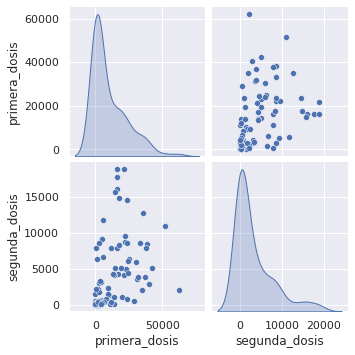

In [ ]:
sns.pairplot(df_plan_vacunarse[['primera_dosis', 'segunda_dosis']], diag_kind='kde')

In [ ]:
df_plan_vacunarse[['primera_dosis', 'segunda_dosis']].corr()

,primera_dosis,segunda_dosis
primera_dosis,1.000000,0.499528
segunda_dosis,0.499528,1.000000


<AxesSubplot:>

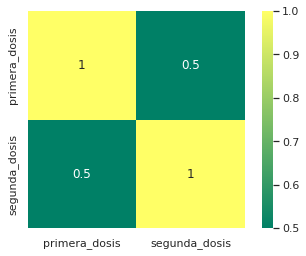

In [ ]:
sns.heatmap(df_plan_vacunarse[['primera_dosis', 'segunda_dosis']].corr(), 
annot=True,
square=True,
cmap='summer')

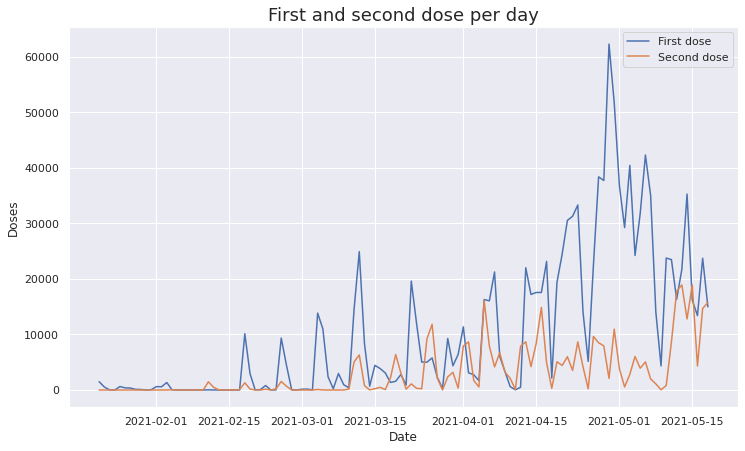

In [ ]:
fig, ax = plt.subplots(figsize=(12, 7))
plt.plot(df_plan_vacunarse.fecha, df_plan_vacunarse.primera_dosis)
plt.plot(df_plan_vacunarse.fecha, df_plan_vacunarse.segunda_dosis)
plt.title('First and second dose per day', size=18)
plt.xlabel('Date')
plt.ylabel('Doses')
plt.legend(['First dose', 'Second dose'])
plt.show()

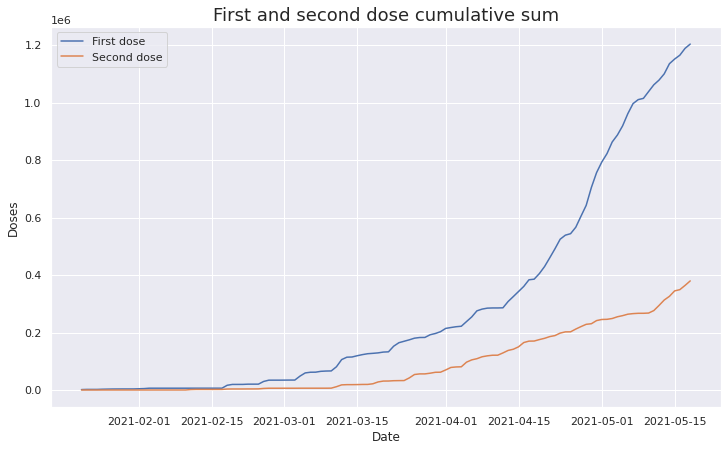

In [ ]:
fig, ax = plt.subplots(figsize=(12, 7))
plt.plot(df_plan_vacunarse.fecha, df_plan_vacunarse.primera_dosis_acumulado)
plt.plot(df_plan_vacunarse.fecha, df_plan_vacunarse.segunda_dosis_acumulado)
plt.title('First and second dose cumulative sum', size=18)
plt.xlabel('Date')
plt.ylabel('Doses')
plt.legend(['First dose', 'Second dose'])
plt.show()

## Vaccinations in general

In [ ]:
df_vaccinated = pd.read_csv('/work/covid-19_ecuador/data/processed/vaccinated.csv')

In [ ]:
df_vaccinated.tail(5)

,fecha,dosis_total,primera_dosis,segunda_dosis,refuerzo
224,2021-11-28,24871775,13220613,11274665,376497
225,2021-11-29,24984734,13250694,11335166,398874
226,2021-11-30,25098057,13286700,11390325,421032
227,2021-12-01,25309620,13356588,11501793,439649
228,2021-12-02,25423529,13384406,11555330,483793


In [ ]:
df_vaccinated.fecha = pd.to_datetime(df_vaccinated.fecha, format='%Y/%m/%d')

In [ ]:
df_vaccinated.describe()

,dosis_total,primera_dosis,segunda_dosis,refuerzo
count,2.290000e+02,2.290000e+02,2.290000e+02,229.000000
mean,1.130981e+07,6.529523e+06,4.747435e+06,32799.567686
std,9.364062e+06,4.966981e+06,4.493659e+06,91903.349164
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,1.560453e+06,1.203517e+06,3.569360e+05,0.000000
50%,1.005118e+07,7.960999e+06,2.090177e+06,0.000000
75%,2.102801e+07,1.107741e+07,9.950596e+06,0.000000
max,2.542353e+07,1.338441e+07,1.155533e+07,483793.000000


In [ ]:
df_vaccinated['primera_dosis_diff'] = df_vaccinated['primera_dosis'].diff()
df_vaccinated['segunda_dosis_diff'] = df_vaccinated['segunda_dosis'].diff()
df_vaccinated['refuerzo_diff'] = df_vaccinated['refuerzo'].diff()
df_vaccinated['dosis_total_diff'] = df_vaccinated['dosis_total'].diff()

In [ ]:
df_vaccinated.fillna(method='bfill', inplace=True)

In [ ]:
df_vaccinated.describe()

,dosis_total,primera_dosis,segunda_dosis,refuerzo,primera_dosis_diff,segunda_dosis_diff,refuerzo_diff,dosis_total_diff
count,2.290000e+02,2.290000e+02,2.290000e+02,229.000000,229.000000,229.000000,229.000000,2.290000e+02
mean,1.130981e+07,6.529523e+06,4.747435e+06,32799.567686,58447.187773,50459.956332,2112.633188,1.110198e+05
std,9.364062e+06,4.966981e+06,4.493659e+06,91903.349164,92041.966324,94928.093722,5841.210038,1.368022e+05
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,-44519.000000,0.000000,0.000000,-2.033800e+04
25%,1.560453e+06,1.203517e+06,3.569360e+05,0.000000,6472.000000,7007.000000,0.000000,2.964300e+04
50%,1.005118e+07,7.960999e+06,2.090177e+06,0.000000,30081.000000,18640.000000,0.000000,6.233200e+04
75%,2.102801e+07,1.107741e+07,9.950596e+06,0.000000,57579.000000,47669.000000,0.000000,1.472450e+05
max,2.542353e+07,1.338441e+07,1.155533e+07,483793.000000,711855.000000,771941.000000,44144.000000,1.064932e+06


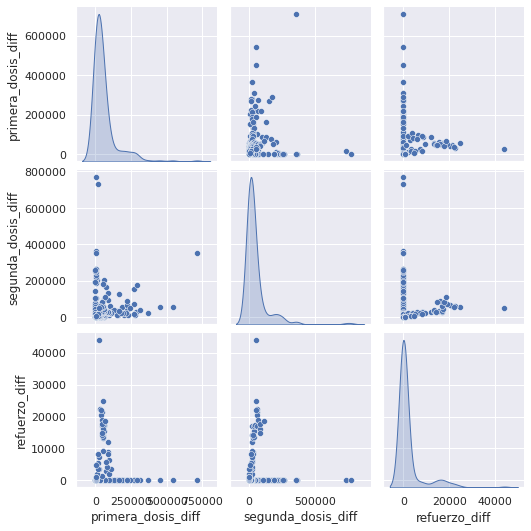

In [ ]:
sns.pairplot(df_vaccinated[['primera_dosis_diff', 'segunda_dosis_diff', 'refuerzo_diff']], diag_kind='kde')

<AxesSubplot:>

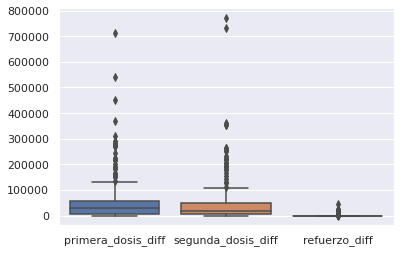

In [ ]:
sns.boxplot(data=df_vaccinated[['primera_dosis_diff', 'segunda_dosis_diff', 'refuerzo_diff']])

In [ ]:
df_vaccinated[['primera_dosis_diff', 'segunda_dosis_diff', 'refuerzo_diff']].corr()

,primera_dosis_diff,segunda_dosis_diff,refuerzo_diff
primera_dosis_diff,1.000000,0.069306,-0.035716
segunda_dosis_diff,0.069306,1.000000,-0.002530
refuerzo_diff,-0.035716,-0.002530,1.000000


<AxesSubplot:>

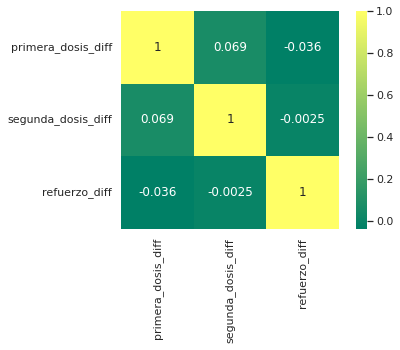

In [ ]:
sns.heatmap(df_vaccinated[['primera_dosis_diff', 'segunda_dosis_diff', 'refuerzo_diff']].corr(), 
annot=True,
square=True,
cmap='summer')

In [ ]:
df_vaccinated.query('primera_dosis_diff < 0')[['primera_dosis_diff']] 

,primera_dosis_diff


In [ ]:
df_vaccinated.loc[157, 'primera_dosis_diff'] = df_vaccinated.loc[157, 'primera_dosis_diff'] * -1

In [ ]:
df_vaccinated.loc[157, 'dosis_total_diff'] = df_vaccinated.loc[157, 'dosis_total_diff'] * -1

In [ ]:
df_vaccinated.iloc[156:159]

,fecha,dosis_total,primera_dosis,segunda_dosis,refuerzo,primera_dosis_diff,segunda_dosis_diff,refuerzo_diff,dosis_total_diff
156,2021-09-19,20472867,10699102,9773765,0,0.0,16196.0,0.0,16196.0
157,2021-09-20,20452529,10654583,9797946,0,44519.0,24181.0,0.0,20338.0
158,2021-09-21,20515688,10699102,9816586,0,44519.0,18640.0,0.0,63159.0


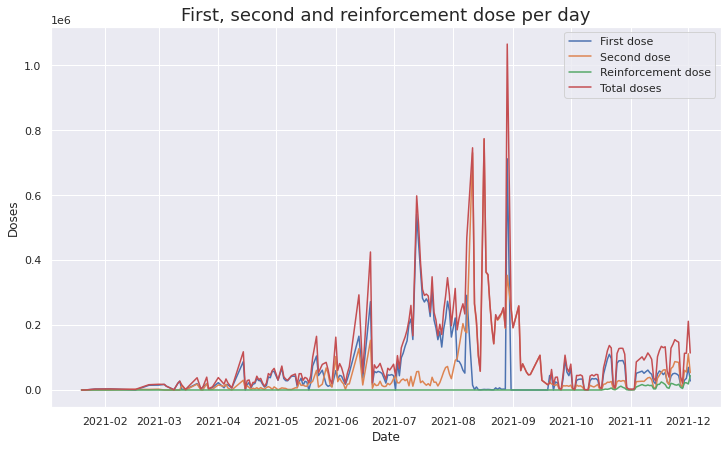

In [ ]:
fig, ax = plt.subplots(figsize=(12, 7))
plt.plot(df_vaccinated.fecha, df_vaccinated.primera_dosis_diff)
plt.plot(df_vaccinated.fecha, df_vaccinated.segunda_dosis_diff)
plt.plot(df_vaccinated.fecha, df_vaccinated.refuerzo_diff)
plt.plot(df_vaccinated.fecha, df_vaccinated.dosis_total_diff)
plt.title('First, second and reinforcement dose per day', size=18)
plt.xlabel('Date')
plt.ylabel('Doses')
plt.legend(['First dose', 'Second dose', 'Reinforcement dose', 'Total doses'])
plt.show()

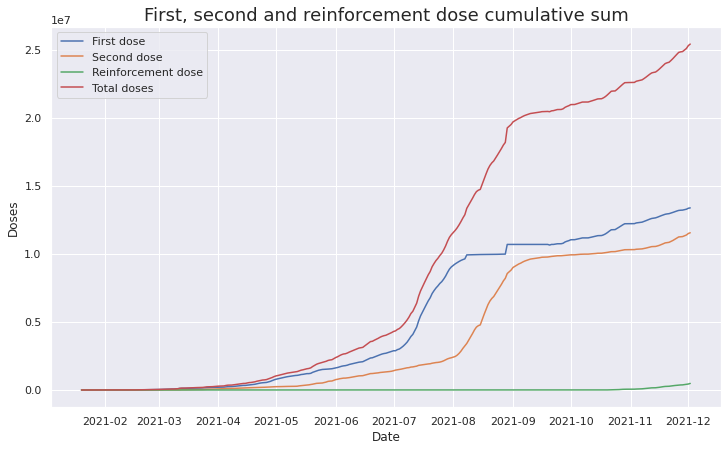

In [ ]:
fig, ax = plt.subplots(figsize=(12, 7))
plt.plot(df_vaccinated.fecha, df_vaccinated.primera_dosis)
plt.plot(df_vaccinated.fecha, df_vaccinated.segunda_dosis)
plt.plot(df_vaccinated.fecha, df_vaccinated.refuerzo)
plt.plot(df_vaccinated.fecha, df_vaccinated.dosis_total)
plt.title('First, second and reinforcement dose cumulative sum', size=18)
plt.xlabel('Date')
plt.ylabel('Doses')
plt.legend(['First dose', 'Second dose', 'Reinforcement dose', 'Total doses'])
plt.show()

In [ ]:
df_vaccinated.to_csv('/work/covid-19_ecuador/data/interim/vaccinated.csv', index=False)

## Manufacturers

In [ ]:
df_manufacturers = pd.read_csv('/work/covid-19_ecuador/data/processed/vacc_manufacturers.csv')

In [ ]:
df_manufacturers.head()

,arrived_at,vaccine,total,contract
0,2021-01-20,Pfizer/BioNTech,8190,Government of Ecuador with Pfizer
1,2021-02-17,Pfizer/BioNTech,16380,Government of Ecuador with Pfizer
2,2021-02-24,Pfizer/BioNTech,17550,Government of Ecuador with Pfizer
3,2021-03-03,Pfizer/BioNTech,31590,Government of Ecuador with Pfizer
4,2021-03-06,Sinovac,20000,Donation from the Government of Chile to the G...


In [ ]:
df_manufacturers['total_cumulative'] = df_manufacturers['total'].cumsum()

In [ ]:
df_manufacturers.dtypes

arrived_at          datetime64[ns]
vaccine                   category
total                        int64
contract                  category
total_cumulative             int64
dtype: object

In [ ]:
df_manufacturers.arrived_at = pd.to_datetime(df_manufacturers.arrived_at, format='%Y/%m/%d')

In [ ]:
df_manufacturers.vaccine = df_manufacturers.vaccine.astype('category')

In [ ]:
df_manufacturers.contract = df_manufacturers.contract.astype('category')

In [ ]:
df_manufacturers.shape

(75, 4)

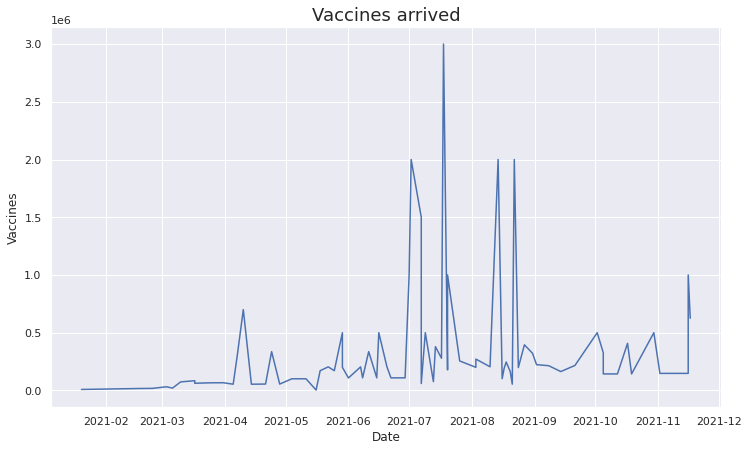

In [ ]:
fig, ax = plt.subplots(figsize=(12, 7))
plt.plot(df_manufacturers.arrived_at, df_manufacturers.total)
plt.title('Vaccines arrived', size=18)
plt.xlabel('Date')
plt.ylabel('Vaccines')
plt.show()

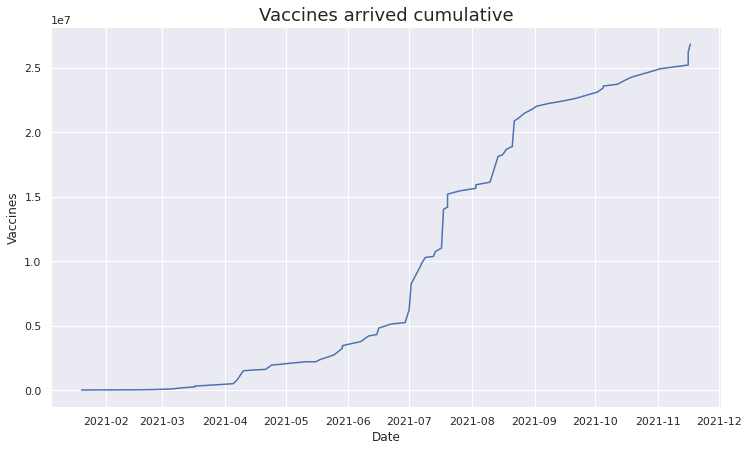

In [ ]:
fig, ax = plt.subplots(figsize=(12, 7))
plt.plot(df_manufacturers.arrived_at, df_manufacturers.total_cumulative)
plt.title('Vaccines arrived cumulative', size=18)
plt.xlabel('Date')
plt.ylabel('Vaccines')
plt.show()

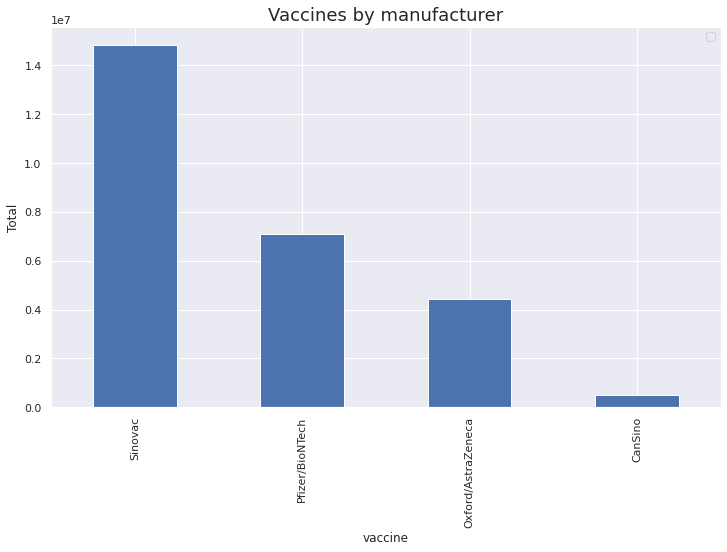

In [ ]:
fig, ax = plt.subplots(figsize=(12, 7))
df_manufacturers.groupby(['vaccine'])[['total']].sum().sort_values(by='total', 
ascending=False).plot.bar(ax=ax)

plt.title('Vaccines by manufacturer', size=18)
plt.ylabel('Total')
plt.legend('')
plt.show()

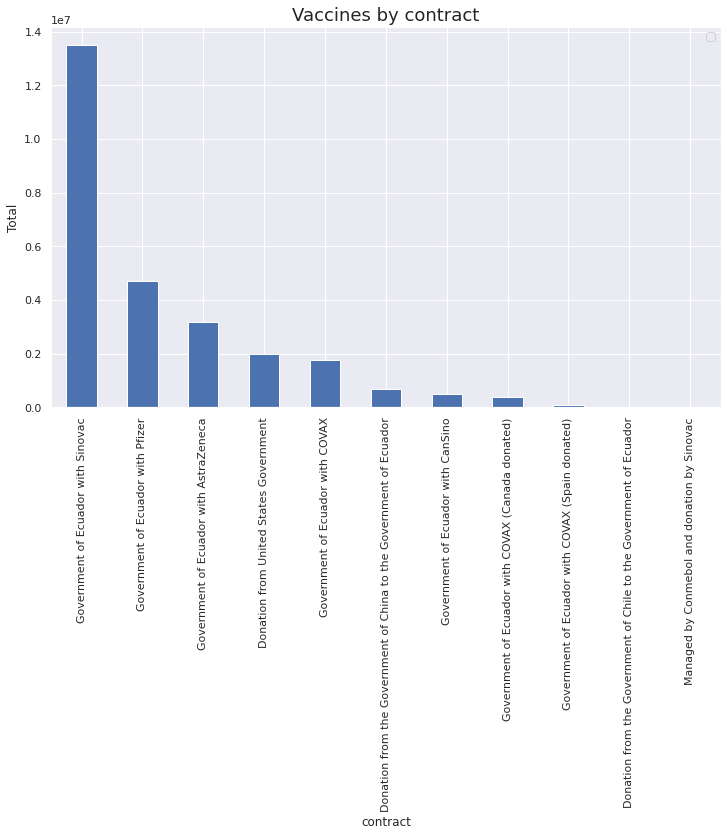

In [ ]:
fig, ax = plt.subplots(figsize=(12, 7))
df_manufacturers.groupby(['contract'])[['total']].sum().sort_values(by='total', 
ascending=False).plot.bar(ax=ax)

plt.title('Vaccines by contract', size=18)
plt.ylabel('Total')
plt.legend('')
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=298bb443-d8b3-4731-ae95-ca4418ea078f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>